In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dense

In [2]:
# Load the data
data_gen = ImageDataGenerator(rescale=1./255) # Normalize the data

In [3]:
train_data = data_gen.flow_from_directory(
        "Train",
        target_size=(150, 150), # Resize the images to 150x150
        batch_size=32,
        class_mode="categorical")

train_data

Found 6779 images belonging to 4 classes.


In [4]:
val_data = data_gen.flow_from_directory(
        "Val",
        target_size=(150, 150),
        batch_size=32,
        class_mode="categorical")

Found 3379 images belonging to 4 classes.


In [5]:
num_classes = len(train_data.class_indices)
num_classes


4

In [6]:
# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))


In [7]:
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [8]:
# Train the model
history = model.fit(
        train_data,
        steps_per_epoch=200, # Number of batches per epoch
        epochs=30,
        validation_data=val_data,
        validation_steps=50)

Epoch 1/30
200/200 [==============================] - 154s 762ms/step - loss: 0.6721 - accuracy: 0.7489 - val_loss: 0.5842 - val_accuracy: 0.7894
Epoch 2/30
200/200 [==============================] - 162s 811ms/step - loss: 0.4725 - accuracy: 0.8405 - val_loss: 0.4919 - val_accuracy: 0.8206
Epoch 3/30
200/200 [==============================] - 164s 820ms/step - loss: 0.3743 - accuracy: 0.8710 - val_loss: 0.4162 - val_accuracy: 0.8281
Epoch 4/30
200/200 [==============================] - 156s 778ms/step - loss: 0.2938 - accuracy: 0.9002 - val_loss: 0.3446 - val_accuracy: 0.8669
Epoch 5/30
200/200 [==============================] - 155s 774ms/step - loss: 0.2443 - accuracy: 0.9127 - val_loss: 0.2071 - val_accuracy: 0.9256
Epoch 6/30
200/200 [==============================] - 155s 775ms/step - loss: 0.2111 - accuracy: 0.9257 - val_loss: 0.2591 - val_accuracy: 0.9025
Epoch 7/30
200/200 [==============================] - 155s 775ms/step - loss: 0.1942 - accuracy: 0.9326 - val_loss: 0.2233 -

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(val_data, steps=50)
print("Test accuracy: ", test_accuracy)

50/50 [==============================] - 9s 174ms/step - loss: 0.0034 - accuracy: 0.9994
Test accuracy:  0.9993749856948853


In [11]:
# Save the model
model.save("saved_model.h5")

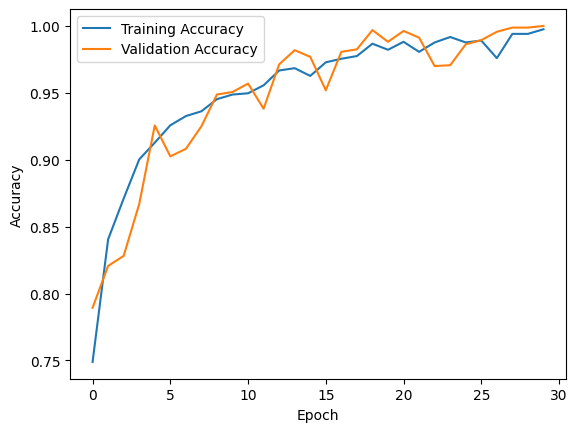

In [12]:
import matplotlib.pyplot as plt

# Get the accuracy values from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy curves
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
